In [1]:
from xmip.preprocessing import combined_preprocessing
from xmip.utils import google_cmip_col
from xmip.postprocessing import match_metrics
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

In [2]:
#NA No-Area
#PP xmip preprocessing error
models = [
#allzeros 'GFDL-CM4',
 'IPSL-CM6A-LR',
 'MIROC6',
#PP 'CESM2-WACCM',
#PP 'CESM2',
 'SAM0-UNICON',
 'CanESM5',
 'MPI-ESM-1-2-HAM',
#NA 'NESM3',
#NA 'CAMS-CSM1-0',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'GFDL-ESM4',
 'NorESM2-LM',
 'MRI-ESM2-0',
#NA is a mask, not area 'FGOALS-f3-L',
 'NorESM2-MM',
#PP 'CESM2-WACCM-FV2',
#PP 'CESM2-FV2',
 'FIO-ESM-2-0',
#PP 'AWI-ESM-1-1-LR',
#NA 'BCC-CSM2-MR',
#NA 'BCC-ESM1',
#PP 'CIESM',
 'CMCC-CM2-SR5',
 'EC-Earth3-AerChem',
 'TaiESM1',
 'NorCPM1',
 'IPSL-CM5A2-INCA',
 'ACCESS-ESM1-5',
 'ACCESS-CM2',
 'CMCC-CM2-HR4',
 'EC-Earth3',
 'EC-Earth3-Veg-LR',
 'EC-Earth3-Veg',
 'CAS-ESM2-0',
#NA is a mask, not area 'FGOALS-g3',
 'EC-Earth3-CC',
 'CMCC-ESM2',
# 'ICON-ESM-LR',
 'IPSL-CM6A-LR-INCA']

In [3]:
cmip6 = google_cmip_col()

In [4]:
#extract from the catalogue SIC and cell area
cat = cmip6.search(
    source_id=models,
    variable_id='siconc', 
    table_id='SImon',
    experiment_id='piControl',
    member_id='r1i1p1f1',
    grid_label='gn'
)
ddict = cat.to_dataset_dict(
    preprocess=combined_preprocessing,
    xarray_open_kwargs={'use_cftime':True},
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/srv/conda/envs/notebook/lib/python3.11/site-packages/xmip/preprocessing.py:96: UserWarning: CMIP.MIROC.MIROC6.piControl.r1i1p1f1.SImon.gn.none.siconc:While renaming to target `lon_bounds`, more than one candidate was found ['x_bnds', 'vertices_longitude']. Renaming x_bnds to lon_bounds. Please double check results.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.11/site-packages/xmip/preprocessing.py:96: UserWarning: CMIP.MIROC.MIROC6.piControl.r1i1p1f1.SImon.gn.none.siconc:While renaming to target `lat_bounds`, more than one candidate was found ['y_bnds', 'vertices_latitude']. Renaming y_bnds to lat_bounds. Please double check results.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.11/site-packages/xmip/preprocessing.py:96: UserWarning: CMIP.MRI.MRI-ESM2-0.piControl.r1i1p1f1.SImon.gn.none.siconc:While renaming to target `lon_bounds`, more than one candidate was found ['x_bnds', 'vertices_longitude']. Renaming x_bnds to lon_bounds. Please double check results.
  warnings.

In [5]:
cat = cmip6.search(
    source_id=models,
    variable_id='areacello', 
    table_id='Ofx',
    experiment_id='piControl',
    member_id='r1i1p1f1',
    grid_label='gn'
)
ddict_area = cat.to_dataset_dict(
    preprocess=combined_preprocessing,
    xarray_open_kwargs={'use_cftime':True},
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/srv/conda/envs/notebook/lib/python3.11/site-packages/xmip/preprocessing.py:96: UserWarning: CMIP.MIROC.MIROC6.piControl.r1i1p1f1.Ofx.gn.none.areacello:While renaming to target `lon_bounds`, more than one candidate was found ['x_bnds', 'vertices_longitude']. Renaming x_bnds to lon_bounds. Please double check results.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.11/site-packages/xmip/preprocessing.py:96: UserWarning: CMIP.MIROC.MIROC6.piControl.r1i1p1f1.Ofx.gn.none.areacello:While renaming to target `lat_bounds`, more than one candidate was found ['y_bnds', 'vertices_latitude']. Renaming y_bnds to lat_bounds. Please double check results.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.11/site-packages/xmip/preprocessing.py:96: UserWarning: CMIP.MRI.MRI-ESM2-0.piControl.r1i1p1f1.Ofx.gn.none.areacello:While renaming to target `lon_bounds`, more than one candidate was found ['x_bnds', 'vertices_longitude']. Renaming x_bnds to lon_bounds. Please double check results.
  warnin

In [6]:
mlist = list(ddict.keys())
print(len(mlist))
mlist

23


['CMIP.MIROC.MIROC6.piControl.SImon.gn',
 'CMIP.SNU.SAM0-UNICON.piControl.SImon.gn',
 'CMIP.EC-Earth-Consortium.EC-Earth3.piControl.SImon.gn',
 'CMIP.NOAA-GFDL.GFDL-ESM4.piControl.SImon.gn',
 'CMIP.NCC.NorESM2-MM.piControl.SImon.gn',
 'CMIP.AS-RCEC.TaiESM1.piControl.SImon.gn',
 'CMIP.FIO-QLNM.FIO-ESM-2-0.piControl.SImon.gn',
 'CMIP.CMCC.CMCC-ESM2.piControl.SImon.gn',
 'CMIP.CMCC.CMCC-CM2-SR5.piControl.SImon.gn',
 'CMIP.HAMMOZ-Consortium.MPI-ESM-1-2-HAM.piControl.SImon.gn',
 'CMIP.CSIRO.ACCESS-ESM1-5.piControl.SImon.gn',
 'CMIP.CAS.CAS-ESM2-0.piControl.SImon.gn',
 'CMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.piControl.SImon.gn',
 'CMIP.MPI-M.MPI-ESM1-2-HR.piControl.SImon.gn',
 'CMIP.IPSL.IPSL-CM5A2-INCA.piControl.SImon.gn',
 'CMIP.IPSL.IPSL-CM6A-LR.piControl.SImon.gn',
 'CMIP.EC-Earth-Consortium.EC-Earth3-CC.piControl.SImon.gn',
 'CMIP.CCCma.CanESM5.piControl.SImon.gn',
 'CMIP.EC-Earth-Consortium.EC-Earth3-Veg.piControl.SImon.gn',
 'CMIP.NCC.NorCPM1.piControl.SImon.gn',
 'CMIP.CSIRO-ARCCS

In [7]:
alist = list(ddict_area.keys())
print(len(alist))
alist

23


['CMIP.IPSL.IPSL-CM6A-LR.piControl.Ofx.gn',
 'CMIP.MIROC.MIROC6.piControl.Ofx.gn',
 'CMIP.CMCC.CMCC-ESM2.piControl.Ofx.gn',
 'CMIP.CCCma.CanESM5.piControl.Ofx.gn',
 'CMIP.NOAA-GFDL.GFDL-ESM4.piControl.Ofx.gn',
 'CMIP.EC-Earth-Consortium.EC-Earth3.piControl.Ofx.gn',
 'CMIP.NCC.NorESM2-MM.piControl.Ofx.gn',
 'CMIP.MRI.MRI-ESM2-0.piControl.Ofx.gn',
 'CMIP.MPI-M.MPI-ESM1-2-LR.piControl.Ofx.gn',
 'CMIP.EC-Earth-Consortium.EC-Earth3-AerChem.piControl.Ofx.gn',
 'CMIP.AS-RCEC.TaiESM1.piControl.Ofx.gn',
 'CMIP.IPSL.IPSL-CM5A2-INCA.piControl.Ofx.gn',
 'CMIP.NCC.NorESM2-LM.piControl.Ofx.gn',
 'CMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.piControl.Ofx.gn',
 'CMIP.EC-Earth-Consortium.EC-Earth3-Veg.piControl.Ofx.gn',
 'CMIP.CSIRO-ARCCSS.ACCESS-CM2.piControl.Ofx.gn',
 'CMIP.CSIRO.ACCESS-ESM1-5.piControl.Ofx.gn',
 'CMIP.CMCC.CMCC-CM2-SR5.piControl.Ofx.gn',
 'CMIP.NCC.NorCPM1.piControl.Ofx.gn',
 'CMIP.EC-Earth-Consortium.EC-Earth3-CC.piControl.Ofx.gn',
 'CMIP.SNU.SAM0-UNICON.piControl.Ofx.gn',
 'CMIP.MPI

In [8]:
# combine cell area with SIC. This removes issues with broadcasting when calculating SIE
ddict_w_area = match_metrics(ddict, ddict_area, 'areacello', dim_length_conflict='align')

/srv/conda/envs/notebook/lib/python3.11/site-packages/xmip/postprocessing.py:591: UserWarning: CMIP.NCC.NorESM2-MM.piControl.r1i1p1f1.SImon.gn.none.siconc:`metric` dimensions ['y:385'] do not match `ds` ['y:384']. Aligning the data on `inner`
  warnings.warn(msg + " Aligning the data on `inner`")
/srv/conda/envs/notebook/lib/python3.11/site-packages/xmip/postprocessing.py:591: UserWarning: CMIP.CMCC.CMCC-ESM2.piControl.r1i1p1f1.SImon.gn.none.siconc:`metric` dimensions ['x:292', 'y:362'] do not match `ds` ['x:291', 'y:360']. Aligning the data on `inner`
  warnings.warn(msg + " Aligning the data on `inner`")
/srv/conda/envs/notebook/lib/python3.11/site-packages/xmip/postprocessing.py:591: UserWarning: CMIP.CMCC.CMCC-CM2-SR5.piControl.r1i1p1f1.SImon.gn.none.siconc:`metric` dimensions ['x:292', 'y:362'] do not match `ds` ['x:291', 'y:360']. Aligning the data on `inner`
  warnings.warn(msg + " Aligning the data on `inner`")
/srv/conda/envs/notebook/lib/python3.11/site-packages/xmip/postproc

In [9]:
# check if all models have areacello (sanity check) 
for name, ds in ddict_w_area.items():
    print(name)
    try:
        print(ds.areacello.shape)
    except:
        print(name+' has no areacello')

CMIP.MIROC.MIROC6.piControl.SImon.gn
(1, 1, 256, 360)
CMIP.SNU.SAM0-UNICON.piControl.SImon.gn
(1, 1, 384, 320)
CMIP.EC-Earth-Consortium.EC-Earth3.piControl.SImon.gn
(1, 1, 292, 362)
CMIP.NOAA-GFDL.GFDL-ESM4.piControl.SImon.gn
(1, 1, 576, 720)
CMIP.NCC.NorESM2-MM.piControl.SImon.gn
(1, 1, 384, 360)
CMIP.AS-RCEC.TaiESM1.piControl.SImon.gn
(1, 1, 384, 320)
CMIP.FIO-QLNM.FIO-ESM-2-0.piControl.SImon.gn
(1, 1, 384, 320)
CMIP.CMCC.CMCC-ESM2.piControl.SImon.gn
(1, 1, 291, 360)
CMIP.CMCC.CMCC-CM2-SR5.piControl.SImon.gn
(1, 1, 291, 360)
CMIP.HAMMOZ-Consortium.MPI-ESM-1-2-HAM.piControl.SImon.gn
CMIP.HAMMOZ-Consortium.MPI-ESM-1-2-HAM.piControl.SImon.gn has no areacello
CMIP.CSIRO.ACCESS-ESM1-5.piControl.SImon.gn
(1, 1, 300, 360)
CMIP.CAS.CAS-ESM2-0.piControl.SImon.gn
CMIP.CAS.CAS-ESM2-0.piControl.SImon.gn has no areacello
CMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.piControl.SImon.gn
(1, 1, 292, 362)
CMIP.MPI-M.MPI-ESM1-2-HR.piControl.SImon.gn
(1, 1, 404, 802)
CMIP.IPSL.IPSL-CM5A2-INCA.piControl.SIm

In [10]:
# create an empty pandas DF
times = pd.date_range(start='1750-01',end='1849-12',freq='MS')+ pd.DateOffset(days=14)
df_sie = pd.DataFrame(index=times)
df_sie

""
1750-01-15
1750-02-15
1750-03-15
1750-04-15
1750-05-15
...
1849-08-15
1849-09-15
1849-10-15
1849-11-15


In [11]:
# remove the items with missing areacello
print(len(ddict_w_area))
ddict_w_area.pop('CMIP.HAMMOZ-Consortium.MPI-ESM-1-2-HAM.piControl.SImon.gn', None)
ddict_w_area.pop('CMIP.CAS.CAS-ESM2-0.piControl.SImon.gn', None)
print(len(ddict_w_area))

23
21


In [12]:
for name, ds in ddict_w_area.items():
    print(name)
    # extract the last 100 years (1200 months)
    NT = ds.time.shape[0]
    ds = ds.isel(time=slice(NT-1200,NT))
    extent = ds.siconc.where(ds.siconc>=15.).squeeze()
    area = ds.areacello.where(ds.lat<-40.).squeeze()
    extent = extent*area/extent*1.e-12 # scale to million km2
    sie = extent.sum(dim=['x','y'],skipna=True)
    print(sie.shape)
    #sie.to_netcdf(model.attrs['source_id'])
    mname = ds.attrs['source_id']
    df_sie[mname] = sie.values

CMIP.MIROC.MIROC6.piControl.SImon.gn
(1200,)
CMIP.SNU.SAM0-UNICON.piControl.SImon.gn
(1200,)
CMIP.EC-Earth-Consortium.EC-Earth3.piControl.SImon.gn
(1200,)
CMIP.NOAA-GFDL.GFDL-ESM4.piControl.SImon.gn
(1200,)
CMIP.NCC.NorESM2-MM.piControl.SImon.gn
(1200,)
CMIP.AS-RCEC.TaiESM1.piControl.SImon.gn
(1200,)
CMIP.FIO-QLNM.FIO-ESM-2-0.piControl.SImon.gn
(1200,)
CMIP.CMCC.CMCC-ESM2.piControl.SImon.gn
(1200,)
CMIP.CMCC.CMCC-CM2-SR5.piControl.SImon.gn
(1200,)
CMIP.CSIRO.ACCESS-ESM1-5.piControl.SImon.gn
(1200,)
CMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.piControl.SImon.gn
(1200,)
CMIP.MPI-M.MPI-ESM1-2-HR.piControl.SImon.gn
(1200,)
CMIP.IPSL.IPSL-CM5A2-INCA.piControl.SImon.gn
(1200,)
CMIP.IPSL.IPSL-CM6A-LR.piControl.SImon.gn
(1200,)
CMIP.EC-Earth-Consortium.EC-Earth3-CC.piControl.SImon.gn
(1200,)
CMIP.CCCma.CanESM5.piControl.SImon.gn
(1200,)
CMIP.EC-Earth-Consortium.EC-Earth3-Veg.piControl.SImon.gn
(1200,)
CMIP.NCC.NorCPM1.piControl.SImon.gn
(1200,)
CMIP.CSIRO-ARCCSS.ACCESS-CM2.piControl.SImon.gn
(12

In [13]:
# sort the order and save to csv
df_sie = df_sie.reindex(sorted(df_sie.columns), axis=1)
df_sie.to_csv('processed/CMIP6-21_SIE_piControl.csv')
df_sie

,ACCESS-CM2,ACCESS-ESM1-5,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3,EC-Earth3-CC,EC-Earth3-Veg,EC-Earth3-Veg-LR,FIO-ESM-2-0,...,IPSL-CM5A2-INCA,IPSL-CM6A-LR,MIROC6,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NorCPM1,NorESM2-MM,SAM0-UNICON,TaiESM1
1750-01-15,3.859704,5.922022,3.325872,2.930917,12.494137,1.654075,1.094620,0.562819,1.263667,10.489067,...,2.399904,6.381862,0.078416,2.572195,1.172552,8.685585,9.904050,2.972736,15.281527,10.381118
1750-02-15,1.118163,4.353984,1.023753,0.219156,8.856300,0.532265,0.267599,0.093609,0.268644,5.546348,...,0.856302,3.960588,0.015672,0.951303,0.475422,4.801763,7.056313,2.063494,8.903074,5.664995
1750-03-15,1.414858,4.561621,1.438679,0.456912,9.880801,0.914593,0.656213,0.362559,0.657650,5.693038,...,1.312890,4.600606,0.091401,1.314058,0.736891,5.467968,7.481496,2.983499,6.763332,5.275675
1750-04-15,4.003339,5.911382,4.108691,3.325496,12.549925,2.228052,1.897079,1.728864,1.866969,9.000564,...,4.312404,7.900963,0.670242,3.192835,1.893397,8.731215,10.481742,4.690347,11.269830,8.611294
1750-05-15,7.958962,9.421897,7.692621,6.813286,15.437388,4.406508,3.983162,4.321121,4.576490,12.508167,...,8.956476,12.921634,1.583843,6.118583,3.997443,13.067725,14.445896,7.250914,15.547088,12.573259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849-08-15,16.081694,17.218157,15.192969,15.497622,21.691971,12.003468,9.284103,8.802489,14.105423,19.967371,...,22.685207,22.698807,3.909674,17.101358,12.867140,21.208118,18.991190,15.285877,21.995855,18.555229
1849-09-15,16.967539,18.296389,15.917757,16.005785,22.281559,13.027071,9.637522,9.490942,15.169296,20.799997,...,22.558289,24.110390,4.141526,18.733908,14.576815,22.323229,20.029486,16.210850,22.338985,18.999241
1849-10-15,16.486706,18.680231,15.588167,15.450315,21.044489,12.926593,9.262279,9.325595,14.403498,20.434559,...,20.419403,23.858521,3.591949,17.921040,14.181762,22.095139,19.446857,15.232931,22.191204,18.715961
1849-11-15,14.691146,17.804464,14.430548,13.949055,18.823446,10.808585,7.616136,7.016587,12.510567,19.042604,...,14.357090,21.826078,2.357072,14.205112,10.442483,20.568903,17.655838,13.034105,20.718430,17.876286


(700,)


Text(0.5, 1.0, 'IPSL-CM6A-LR')

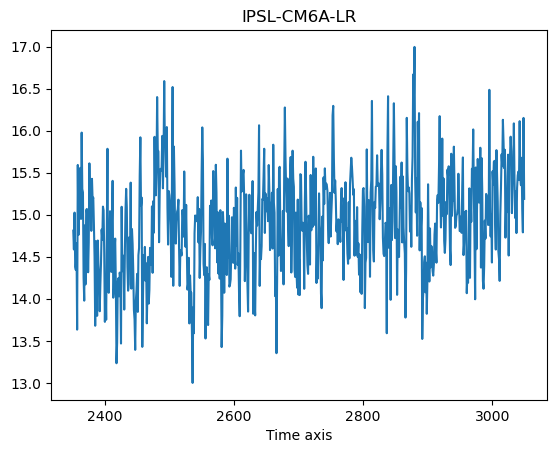

In [14]:
model = ddict_w_area['CMIP.IPSL.IPSL-CM6A-LR.piControl.SImon.gn']
extent = model.siconc.where(model.siconc>=15).squeeze()
area = model.areacello.where(model.lat<-40.).squeeze()
extent = extent*area/extent*1.e-12 # scale to million km2
sie = extent.sum(dim=['x','y'],skipna=True).coarsen(time=12).mean()
print(sie.shape)
sie.plot()
plt.title(model.attrs['source_id'])

In [18]:
model.time.shape

(8400,)

(500,)


Text(0.5, 1.0, 'CMCC-ESM2')

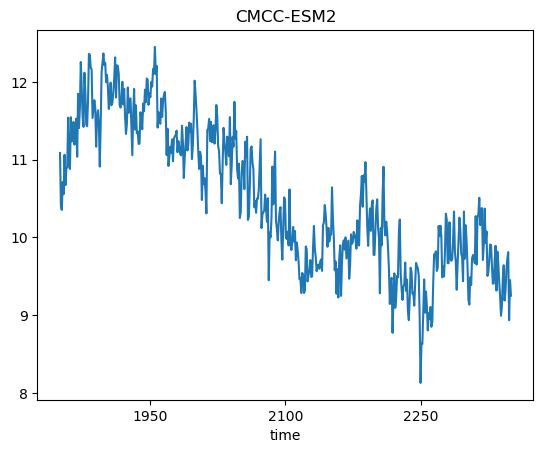

In [10]:
model = ddict_w_area['CMIP.CMCC.CMCC-ESM2.piControl.SImon.gn']
extent = model.siconc.where(model.siconc>=15).squeeze()
area = model.areacello.where(model.lat<-40.).squeeze()
extent = extent*area/extent*1.e-12 # scale to million km2
sie = extent.sum(dim=['x','y'],skipna=True).coarsen(time=12).mean()
print(sie.shape)
sie.plot()
plt.title(model.attrs['source_id'])

In [19]:
NT = model.time.shape[0]
m100 = model.isel(time=slice(NT-1200,NT))
m100.time

<xarray.DataArray 'time' (time: 1200)> Size: 10kB
array([cftime.DatetimeGregorian(2950, 1, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2950, 2, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2950, 3, 16, 12, 0, 0, 0, has_year_zero=False),
       ...,
       cftime.DatetimeGregorian(3049, 10, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(3049, 11, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(3049, 12, 16, 12, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
    type     |S6 6B b'typesi'
  * time     (time) object 10kB 2950-01-16 12:00:00 ... 3049-12-16 12:00:00
Attributes:
    axis:           T
    bounds:         time_bounds
    long_name:      Time axis
    standard_name:  time